In [1]:
# module imports
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

# Sklearn module imports
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

path = "C:/Users/indie/OneDrive/Desktop/Assignment 5/Task2-RandomForest/Data"

# ----------------------------------------------------------------------------------

# Initializes individual data sets
class_up = pd.DataFrame()
class_down = pd.DataFrame()
class_stop = pd.DataFrame()
class_go = pd.DataFrame()
up_files = 0
down_files = 0
stop_files = 0
go_files = 0

# Strings used to open the correct files
up_match = "up"
down_match = "down"
stop_match = "stop"
go_match = "go"

# Counts all the files in a given directory.
initial_count = len(
    [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
)
dirre = os.listdir(path)
file_count = 2 * len(dirre)

# Iterates through the directory and compiles data for waves and fist bumps.
# Also displays a progress bar at the bottom which keeps track of work done.
with tqdm(total=file_count) as pbar:
    for subdir, dirs, files in os.walk(path):
        for file in files:
            os.chdir(subdir)

            # Checks for up audio file and then pulls data
            if up_match in file.lower():
                pbar.update(1)  # Increment the progress bar
                up_array = np.genfromtxt(
                    file,
                    delimiter=",",
                    dtype=np.float32,
                    usecols=range(64),
                    skip_header=1,
                )
                up_array = up_array.reshape(25, 64)
                up_data_array = pd.DataFrame(up_array)
                class_up = pd.concat([class_up, up_data_array])
                up_files += 1

            # Checks for down audio file and then pulls data
            if down_match in file.lower():
                pbar.update(1)  # Increment the progress bar
                down_array = np.genfromtxt(
                    file,
                    delimiter=",",
                    dtype=np.float32,
                    usecols=range(64),
                    skip_header=1,
                )
                down_array = down_array.reshape(25, 64)
                down_data_array = pd.DataFrame(down_array)
                class_down = pd.concat([class_down, down_data_array])
                down_files += 1

            # Checks for go audio file and then pulls data
            if go_match in file.lower():
                pbar.update(1)  # Increment the progress bar
                go_array = np.genfromtxt(
                    file,
                    delimiter=",",
                    dtype=np.float32,
                    usecols=range(64),
                    skip_header=1,
                )
                go_array = go_array.reshape(25, 64)
                go_data_array = pd.DataFrame(go_array)
                class_go = pd.concat([class_go, go_data_array])
                go_files += 1

            # Checks for stop audio file and then pulls data
            if stop_match in file.lower():
                pbar.update(1)  # Increment the progress bar
                stop_array = np.genfromtxt(
                    file,
                    delimiter=",",
                    dtype=np.float32,
                    usecols=range(64),
                    skip_header=1,
                )
                stop_array = stop_array.reshape(25, 64)
                stop_data_array = pd.DataFrame(stop_array)
                class_stop = pd.concat([class_stop, stop_data_array])
                stop_files += 1

pbar.close()

# Combines all of class data for wave and fistbumps into single set
class_data = pd.concat([class_up, class_down, class_go, class_stop])
samples, unused_y = class_data.shape
asserts = samples * unused_y
# ----------------------------------------------------------------------------------

# Creates y labels
# Combines all of class data for wave and fistbumps into single set
class_data = pd.concat([class_up, class_down, class_go, class_stop])

# Creates y labels
y = np.zeros((up_files + down_files + go_files + stop_files) * 25)
for a in range(up_files * 25, (up_files + down_files) * 25, 1):
    y[a] = 1
for b in range(
    (up_files + down_files) * 25, (up_files + down_files + go_files) * 25, 1
):
    y[b] = 2
for c in range(
    (up_files + down_files + go_files) * 25,
    (up_files + down_files + go_files + stop_files) * 25,
    1,
):
    y[c] = 3

76it [00:00, 435.45it/s]              


              precision    recall  f1-score   support

         0.0       0.65      0.48      0.55       121
         1.0       0.36      0.75      0.49       108
         2.0       0.56      0.35      0.43       132
         3.0       0.51      0.36      0.42       114

    accuracy                           0.48       475
   macro avg       0.52      0.48      0.47       475
weighted avg       0.53      0.48      0.47       475



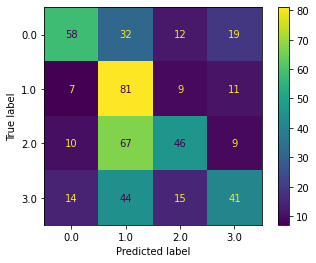

In [2]:
# ----------------------------------------------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(class_data, y, random_state=0)

# creates logistic regression classifier; fits data with trained sets; generates predictions from test split
model = RandomForestClassifier(max_depth=3)
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))
plt.show()
# ----------------------------------------------------------------------------------

In [3]:
# ----------------------------------------------------------------------------------
from micromlgen import port

# File path + name
path = "C:/Users/indie/Assignment 5/model"
file = "Classifier"

# Checks if the path already exists and if it doesn't, it's created
if not os.path.exists(path):
    os.makedirs(path)

# Removes Classifier.h if it was already created so new one can be made
if os.path.exists("C:/Users/indie/Assignment 5/model/Classifier.h"):
    os.remove("C:/Users/indie/Assignment 5/model/Classifier.h")

# Creates file
filename = file + ".h"
with open("C:/Users/indie/Assignment 5/model/Classifier.h", "w") as file:
    file.write(port(model, classname="Classifier"))

# Checks file size, converts it to kb, and prints output
file_size = os.path.getsize("C:/Users/indie/Assignment 5/model/Classifier.h")
kb = round(file_size / 1024, 1)
print("File size:", kb, "kb")
# ----------------------------------------------------------------------------------

File size: 159.8 kb
